<a href="https://colab.research.google.com/github/edgartamu/DeepLearning/blob/main/Ejercicio1_classify_numbers_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recognition of written numbers**
In this workbook, we will build a neural network that recognizes written numbers from 0 to 9.

This type of neural network is used in a variety of real-world applications, including: phone number recognition and sorting postal mail by address. To build the network, we will use the MNIST dataset, which consists of images of handwritten numbers and their correct labels from 0 to 9.

We will use keras, a high-level library built on top of TensorFlow to build the neural network. We will start by importing all the modules we will need, then load the data and finally build the network.

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical

# **Preparation of training and test data**.

The MNIST dataset already contains training and test data. There are 55,000 training data points and 10,000 test data points.

Each MNIST data point has an image of a handwritten digit and a corresponding label (a number 0-9).
a corresponding label (a number 0-9 that identifies the image).
We will call the images, which will be the input to our neural network, X and their corresponding Y labels.

We will want our labels to be one-hit vectors, i.e., vectors containing mostly 0's and one 1. It is easier to see this in an example. As a one-hit vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0].


# Flattened data
For this example, we will use flattened data or a representation of the MNIST images in one dimension instead of two. Thus, each handwritten number image, which has 28x28 pixels, will be represented as a one-dimensional array of 784 pixel values.

Flattening the data removes information about the 2D structure of the image, but simplifies our data so that all the training data can be contained in a matrix whose shape is [55000, 784]; the first dimension is the number of training images and the second is the number of pixels in each image. This is the type of data that is easy to analyze using a simple neural network.
Recognition of written numbers


In [ ]:
# Cargamos los datos de train y test
(trainX, trainY), (testX, testY) = mnist.load_data()

**Enter the code required to display the size of the data obtained** 

In [ ]:
print ("Tamaño de trainX: ", trainX.shape)
print ("Tamaño de trainY: ", trainY.shape)
print ("Tamaño de testX: ", testX.shape)
print ("Tamaño de testY: ", testY.shape)

Tamaño de trainX:  (60000, 28, 28)
Tamaño de trainY:  (60000,)
Tamaño de testX:  (10000, 28, 28)
Tamaño de testY:  (10000,)


# **Viewing training data**
Below is a function that will help you visualize MNIST data. When passing the index of a training example, the show_digit function will display that training image along with its corresponding title tag.

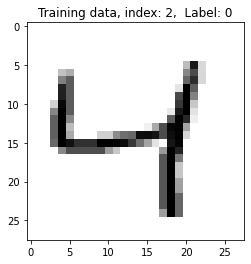

In [ ]:
#Función para visualizar los datos que acabamos de cargar
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Visualizamos el dígito que queramos pasando una posicióndel array
display_digit(2)

# **MLP Model**

In [ ]:
num_pixels = trainX.shape[1] * trainX.shape[2] # 28*28
trainX = trainX.reshape(trainX.shape[0], num_pixels).astype('float32')
testX = testX.reshape(testX.shape[0], num_pixels).astype('float32')
trainX.shape


(60000, 784)

In [ ]:
#Normalize [0..1]
trainX = trainX / 255
testX = testX / 255

# one hot encoding for labels
trainY = to_categorical(trainY)
testY = to_categorical(testY)
num_classes = testY.shape[1]

testY.shape

(10000, 10)

In [ ]:
# Nuestro modelo
def build_model():
    # Con esta linea se resetean todos los parametros y variables
    tf.compat.v1.reset_default_graph()
    
    #### Your code ####
    model = Sequential()
    model.add(Flatten(x,), ) #capa de entrada / flatten
    model.add(Dense(512 ))
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilamos el modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# **Training**

In [ ]:
# construye el modelo
model = build_model()
model.summary()

model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=128, verbose=2)


scores = model.evaluate(testX, testY, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 - 5s - loss: 0.2476 - accuracy: 0.9284 - val_loss: 0.1232 - val_accuracy: 0.9620
Epoch 2/10
469/469 - 5s - loss: 0.0976 - accuracy: 0.9720 - val_loss: 0.0852 - val_accuracy: 0.9728
Epoch 3/10
469/469 - 5s - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.0681 - val_accuracy: 0.9785
Epoch 4/10
469/469 - 5s - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0571 - val_ac


# **Testing**


In [ ]:
# Comparar los resultados obtenidos de la predicción del modelo con las clases reales 
# Con la función argmax lo que hacemos es obtener el índice con mayor valor del array (en este caso de un array [ 0  0.2  0.2 0.1 0.5] obtendriamos un 4)
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Igual ocurre con las clases reales, lo traducimos de array a valor numérico y sacamos la media de aciertos
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9804


**Confusion matrix**

In [ ]:
y_pred = model.predict(testX)
y_pred = np.argmax(y_pred, axis=1)

confusion_matrix = confusion_matrix(y_true=testY.argmax(axis=1), y_pred=y_pred)
confusion_matrix

array([[ 972,    0,    1,    0,    2,    0,    1,    1,    2,    1],
       [   0, 1125,    4,    0,    0,    1,    2,    2,    1,    0],
       [   1,    0, 1017,    0,    1,    0,    2,    8,    2,    1],
       [   0,    0,    6,  978,    0,    9,    0,    5,    1,   11],
       [   0,    0,    4,    0,  967,    0,    3,    2,    0,    6],
       [   2,    0,    0,    2,    1,  877,    2,    2,    3,    3],
       [   4,    2,    4,    1,    4,    2,  940,    1,    0,    0],
       [   0,    1,   10,    1,    0,    0,    0, 1010,    1,    5],
       [   5,    0,    8,    5,    4,    5,    0,    7,  932,    8],
       [   3,    2,    0,    2,    5,    1,    0,    9,    1,  986]])

**Quality measures**

In [ ]:
#MEDIDAS DE CALIDAD
snn_report = classification_report(np.argmax(testY, axis=1), y_pred)  
print(snn_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.98      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Exercise 1 - Convolutional Networks

For this exercise, as shown in the rest of the notebook, we have an MLP network for classification.
Based on the MLP network we are going to design a convolutional network to try to improve the accuracy of the results. To do this we are asked to:


1.   Generate and train a convolutional network.
2.   Compare the results obtained with the MLP network.



